In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('final_data.xlsx')

In [6]:
X = df.iloc[:, 1:]

In [8]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

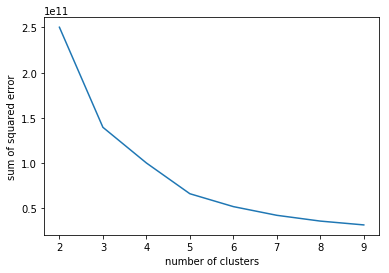

In [15]:
# Find optimum k value
inertia_results = []
k_range = range(2, 10)
for k in k_range:
    clusterer = KMeans(n_clusters=k, n_jobs=-1)
    clusterer.fit(X)
    inertia_results.append(clusterer.inertia_)
    
plt.plot(k_range, inertia_results)
plt.xlabel("number of clusters")
plt.ylabel("sum of squared error")
plt.show()

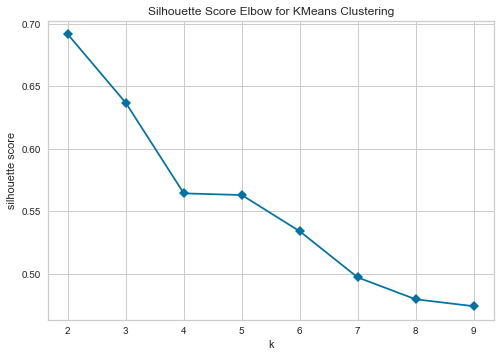

In [20]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans()

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()

In [18]:
def findMinDiff(arr, n): 
    # Initialize difference as infinite 
    diff = 10**20
      
    # Find the min diff by comparing difference 
    # of all possible pairs in given array 
    for i in range(n-1): 
        for j in range(i+1,n): 
            if abs(arr[i]-arr[j]) < diff: 
                diff = abs(arr[i] - arr[j]) 
  
    # Return min diff and indices
    return diff, i

In [19]:
# optimum k is 6 according to sum of squared error
result = findMinDiff(inertia_results, len(inertia_results))
opt_k = result[1]
result

(4237690428.072567, 6)

In [21]:
best_clusterer = KMeans(n_clusters=opt_k, n_jobs=-1)
best_clusterer.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
import collections

# Let's check mean of total sales amount of each cluster
result_dict = {}
for i in range(opt_k):
    mask = best_clusterer.labels_ == i
    result_dict[str(i)] = df[mask]['Satış Miktarı'].mean()
    
sorted_d = sorted(result_dict.items(), key=lambda kv: kv[1])
result_dict = collections.OrderedDict(sorted_d)
print(result_dict)

OrderedDict([('1', 195.57643660152203), ('4', 664.4542197614298), ('2', 901.5171284411791), ('0', 1547.2766736401675), ('3', 2568.6810534016095), ('5', 7171.195121951219)])


In [26]:
import collections

# Let's check mean of total sales amount of each cluster
result_dict = {}
for i in range(opt_k):
    mask = best_clusterer.labels_ == i
    result_dict[str(i)] = df[mask]['Birim fiyat'].mean()
    
sorted_d = sorted(result_dict.items(), key=lambda kv: kv[1])
result_dict = collections.OrderedDict(sorted_d)
print(result_dict)

OrderedDict([('4', 4.640856615854659), ('3', 5.459301636793633), ('0', 5.777526874869535), ('5', 6.113265525683043), ('2', 6.606752857747735), ('1', 7.442849352068391)])


In [23]:
clusters = collections.Counter(best_clusterer.labels_)

In [24]:
# Percentages
for i, j in dict(clusters).items():
    print(i, str(j/85487))

1 0.5193187268239615
4 0.2873302373460292
2 0.13214874776281774
3 0.01599073543345772
0 0.044731947547580336
5 0.00047960508615345023


In [25]:
best_clusterer.cluster_centers_

array([[1.01799686e+02, 6.44586820e+00, 8.77092050e-01, 1.54176255e+01,
        6.40376569e+00, 2.01716449e+03, 6.99012857e+03, 5.77752687e+00,
        1.24591789e+00, 1.54727667e+03],
       [9.29085341e+01, 4.52015312e+00, 6.91353299e-01, 1.57105156e+01,
        6.43413646e+00, 2.01704605e+03, 6.31923416e+02, 7.44164388e+00,
        1.07788944e+00, 1.95669869e+02],
       [1.00266318e+02, 6.06934727e+00, 8.68745018e-01, 1.56769108e+01,
        6.49703304e+00, 2.01716358e+03, 4.27073413e+03, 6.60640855e+00,
        1.13248428e+00, 9.01680188e+02],
       [1.27042429e+02, 7.11997074e+00, 9.13679590e-01, 1.59275786e+01,
        6.93782004e+00, 2.01744916e+03, 1.32389858e+04, 5.45930164e+00,
        1.27520117e+00, 2.56868105e+03],
       [1.14190030e+02, 6.95173902e+00, 6.09472998e-01, 1.58486601e+01,
        6.80944042e+00, 2.01709290e+03, 2.12048380e+03, 4.64196390e+00,
        1.09675694e+00, 6.64554614e+02],
       [7.36341463e+01, 6.53658537e+00, 4.63414634e-01, 1.71707317e+01,
   

In [27]:
collections.Counter(best_clusterer.labels_)

Counter({1: 44395, 4: 24563, 2: 11297, 3: 1367, 0: 3824, 5: 41})